In [0]:
import numpy as np
import scipy.io as sio
import math

In [0]:
def noiselet(n):
    error = 'The input argument should be of form 2^k'
    assert n >= 2, error
    assert np.log2(n) == np.floor(np.log2(n)), error

    N = 0.5 * np.array([[1.-1.j, 1.+1.j],
                        [1.+1.j, 1.-1.j]])
    for idx in np.arange(1, int(np.log2(n))):
        N1 = np.copy(N)
        N = np.zeros((2**(idx+1), 2**(idx+1))).astype(complex)
        for i, k in enumerate(np.arange(0, N.shape[0], 2)):
            N[k,:] = 0.5 * np.kron([1.-1.j, 1.+1.j], N1[i,:])
        for i, k in enumerate(np.arange(1, N.shape[0], 2)):
            N[k,:] = 0.5 * np.kron([1.+1.j, 1.-1.j], N1[i,:])
    return N

In [4]:
from google.colab import files
uploaded = files.upload()

Saving full.mat to full (1).mat
Saving haar.mat to haar.mat


In [0]:
signal = sio.loadmat('/content/full.mat')

In [0]:
haar = sio.loadmat('/content/haar.mat')

In [7]:
X = signal['X']
haar = haar['W']

print(' Signal maxtrix shape', X.shape)
print('Haar wavelet basis', haar.shape)

 Signal maxtrix shape (1024, 1)
Haar wavelet basis (1024, 1024)


In [8]:
noiselet(1024).shape

(1024, 1024)

In [0]:
##
import matplotlib.pyplot as plt

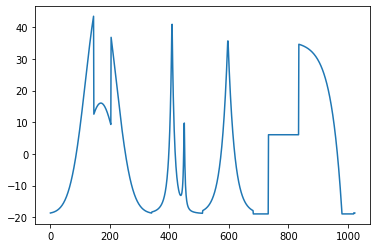

In [13]:
plt.plot(X)

In [0]:
# create noiselet sensing matrix
n = 600
indices = np.random.randint(low = 0, high = 1024, size = n)

In [0]:
N = noiselet(1024)

In [0]:
phi = N[indices,:]

In [18]:
phi.shape

(600, 1024)

In [0]:
# compressed signal
y = np.inner(phi, X.T)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


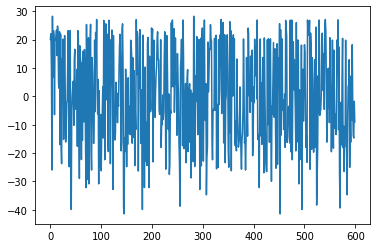

In [22]:
plt.plot(y)

In [0]:
#Initial guess
X0 = np.dot(haar.T, np.dot(phi.T, y))

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


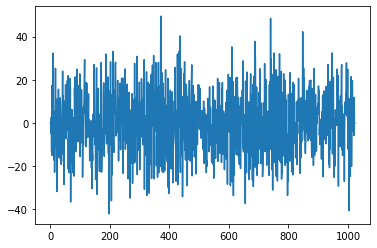

In [29]:
plt.plot(X0)

In [0]:
# create noiselet sensing matrix
n_700 = 700
indices_700 = np.random.randint(low = 0, high = 1024, size = n)
phi_700 = N[indices,:]
y_700 = np.inner(phi, X.T)

In [0]:
# create noiselet sensing matrix
n_800 = 800
indices_800 = np.random.randint(low = 0, high = 1024, size = n)
phi_800 = N[indices,:]
y_800 = np.inner(phi, X.T)

In [0]:
# create noiselet sensing matrix
n_900 = 900
indices_900 = np.random.randint(low = 0, high = 1024, size = n)
phi_900 = N[indices,:]
y_900 = np.inner(phi, X.T)

17.931511771262883

In [0]:
### adding standard noise to original signal 
X_noise = np.zeros(X.shape)
for i in range(len(X_noise)):
  X_noise[i,0] =  X[i,0]+np.random.normal(0,3)

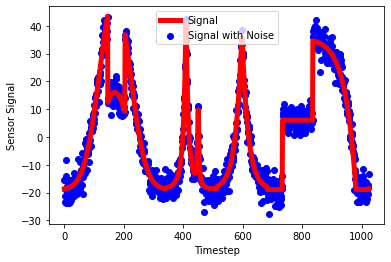

In [58]:
t = np.linspace(0,1024,1024)
plt.plot(t, X, color ='red', linewidth =5, label  ='Signal')
plt.scatter(t, X_noise, color = 'blue', label = 'Signal with Noise')
plt.legend()
plt.xlabel('Timestep')
plt.ylabel('Sensor Signal')
plt.show()